In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/sample_data/Sample.csv', encoding='cp1251')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [ ]:
df.isna().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [ ]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [ ]:
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%Y')

In [ ]:
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%m/%d/%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [ ]:
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


In [ ]:
daily_orders = df.groupby('Order Date')['Order ID'].nunique().reset_index().rename(columns={"Order Date": "date", "Order ID": "orders"}) # Количество заказов по дням

In [ ]:
def get_season(num):
  if num in (12, 1, 2):
    return 'Зима'
  if num in (3, 4, 5):
    return 'Весна'
  if num in (6, 7, 8):
    return 'Лето'
  if num in (9, 10, 11):
    return 'Осень'

In [ ]:
df['Season'] = df['Order Date'].dt.month.apply(get_season)

In [ ]:
df[['Season', 'Order Date']]

,Season,Order Date
0,Осень,2016-11-08
1,Осень,2016-11-08
2,Лето,2016-06-12
3,Осень,2015-10-11
4,Осень,2015-10-11
...,...,...
9989,Зима,2014-01-21
9990,Зима,2017-02-26
9991,Зима,2017-02-26
9992,Зима,2017-02-26


In [ ]:
season_orders = df.groupby('Season')['Order ID'].nunique().reset_index(name='Orders') # График
season_orders = season_orders.sort_values('Orders', ascending=False)
season_orders

,Season,Orders
3,Осень,1858
0,Весна,1066
2,Лето,1043
1,Зима,1042


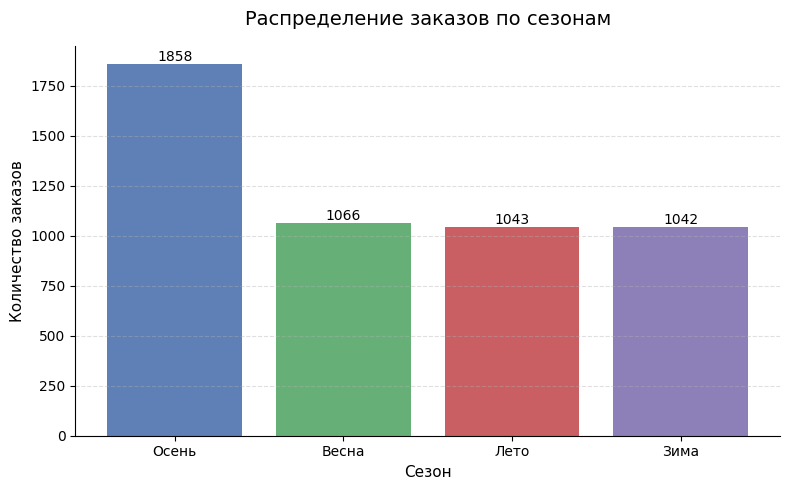

In [ ]:
colors = ["#4C72B0", "#55A868", "#C44E52", "#8172B2"]

plt.figure(figsize=(8,5))
plt.bar(
    season_orders["Season"],
    season_orders["Orders"],
    color=colors[:len(season_orders)],
    alpha=0.9
)
for i, value in enumerate(season_orders["Orders"]):
    plt.text(i, value, f"{value:}",
             ha="center", va="bottom", fontsize=10)
ax = plt.gca()
plt.grid(axis="y", linestyle="--", alpha=0.4)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.title("Распределение заказов по сезонам", fontsize=14, pad=15)
plt.xlabel("Сезон", fontsize=11)
plt.ylabel("Количество заказов", fontsize=11)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

plt.savefig("1.Распределение заказов по сезонам.png", dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
year_season_orders = (df.groupby([df["Order Date"].dt.year, "Season"])["Order ID"].nunique().reset_index(name="Orders").rename(columns={"Order Date": "Year"}))
year_season_orders

,Year,Season,Orders
0,2014,Весна,206
1,2014,Зима,201
2,2014,Лето,203
3,2014,Осень,359
4,2015,Весна,225
5,2015,Зима,226
6,2015,Лето,202
7,2015,Осень,385
8,2016,Весна,283
9,2016,Зима,269


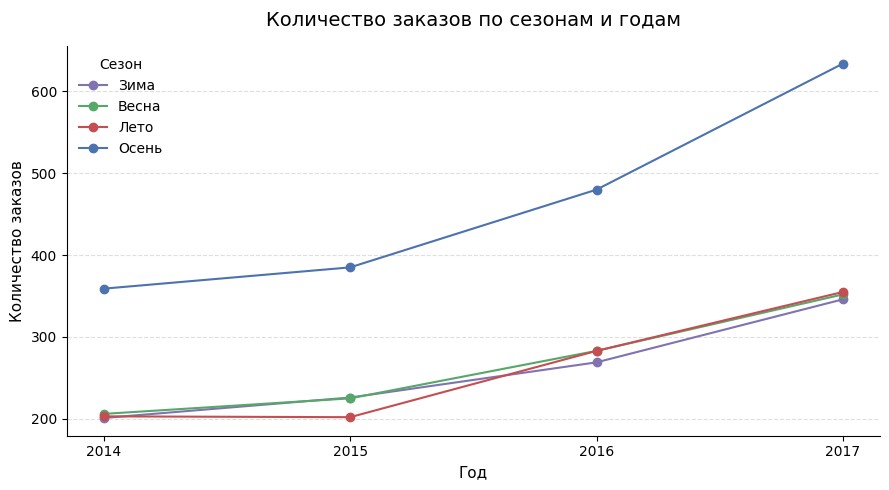

In [ ]:
colors = {
    "Зима": "#8172B2",
    "Весна": "#55A868",
    "Лето": "#C44E52",
    "Осень": "#4C72B0"
}

plt.figure(figsize=(9,5))

for season, color in colors.items():
    data = year_season_orders[year_season_orders["Season"] == season]
    plt.plot(
        data["Year"],
        data["Orders"],
        marker="o",
        label=season,
        color=color
    )

plt.title("Количество заказов по сезонам и годам", fontsize=14, pad=15)
plt.xlabel("Год", fontsize=11)
plt.ylabel("Количество заказов", fontsize=11)

plt.grid(axis="y", linestyle="--", alpha=0.4)

ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
years = sorted(year_season_orders["Year"].unique())
plt.xticks(years)
plt.legend(title="Сезон", frameon=False)
plt.tight_layout()
plt.savefig("2.Количество заказов по сезонам и годам.png", dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
category_orders = (df["Category"].value_counts().reset_index())
category_orders.columns = ["Category", "Orders"]
category_orders

,Category,Orders
0,Office Supplies,6026
1,Furniture,2121
2,Technology,1847


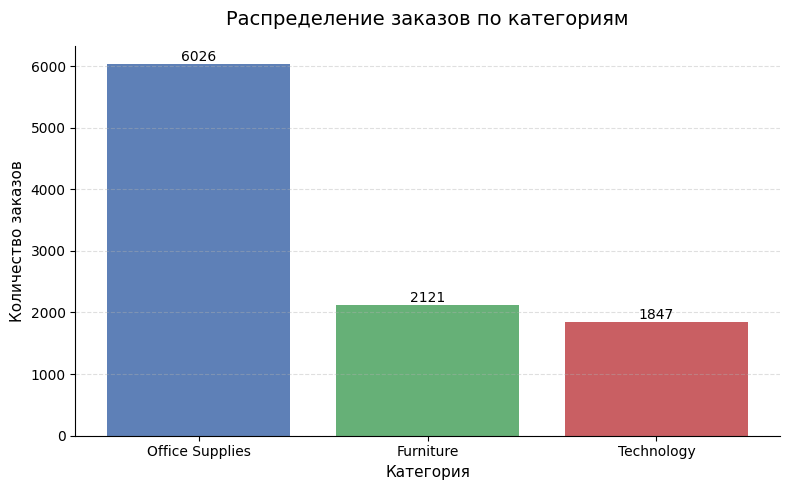

In [ ]:
colors = ["#4C72B0", "#55A868", "#C44E52"]

plt.figure(figsize=(8,5))

plt.bar(
    category_orders["Category"],
    category_orders["Orders"],
    color=colors[:len(category_orders)],
    alpha=0.9
)

# подписи значений
for i, value in enumerate(category_orders["Orders"]):
    plt.text(
        i, value,
        f"{value:}",
        ha="center",
        va="bottom",
        fontsize=10
    )

plt.title("Распределение заказов по категориям", fontsize=14, pad=15)
plt.xlabel("Категория", fontsize=11)
plt.ylabel("Количество заказов", fontsize=11)

plt.grid(axis="y", linestyle="--", alpha=0.4)

ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.savefig("3.Распределение заказов по категориям.png", dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
category_profit = df.groupby('Category')['Profit'].sum().reset_index()
category_profit # Какая категория самая прибыльная

,Category,Profit
0,Furniture,18451.2728
1,Office Supplies,122490.8008
2,Technology,145454.9481


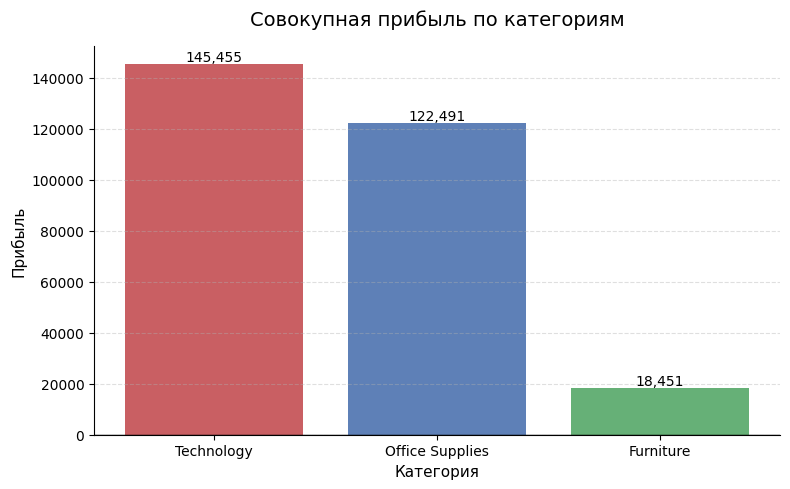

In [ ]:
category_profit = category_profit.sort_values('Profit', ascending=False)
plt.figure(figsize=(8,5))
colors = ["#C44E52", "#4C72B0", "#55A868"]
plt.bar(
    category_profit["Category"],
    category_profit["Profit"],
    color=colors[:len(category_profit)],
    alpha=0.9
)
plt.axhline(0, color="black", linewidth=1)

for i, value in enumerate(category_profit["Profit"]):
    plt.text(
        i,
        value,
        f"{value:,.0f}",
        ha="center",
        va="bottom" if value >= 0 else "top",
        fontsize=10
    )

plt.title("Совокупная прибыль по категориям", fontsize=14, pad=15)
plt.xlabel("Категория", fontsize=11)
plt.ylabel("Прибыль", fontsize=11)

plt.grid(axis="y", linestyle="--", alpha=0.4)

ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.tight_layout()
plt.savefig("4.Совокупная прибыль по категориям.png", dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
order_counts = df.groupby([df['Category'], df['Sub-Category']])['Order ID'].nunique().reset_index()
order_counts #График

,Category,Sub-Category,Order ID
0,Furniture,Bookcases,224
1,Furniture,Chairs,576
2,Furniture,Furnishings,877
3,Furniture,Tables,307
4,Office Supplies,Appliances,451
5,Office Supplies,Art,731
6,Office Supplies,Binders,1316
7,Office Supplies,Envelopes,249
8,Office Supplies,Fasteners,215
9,Office Supplies,Labels,346


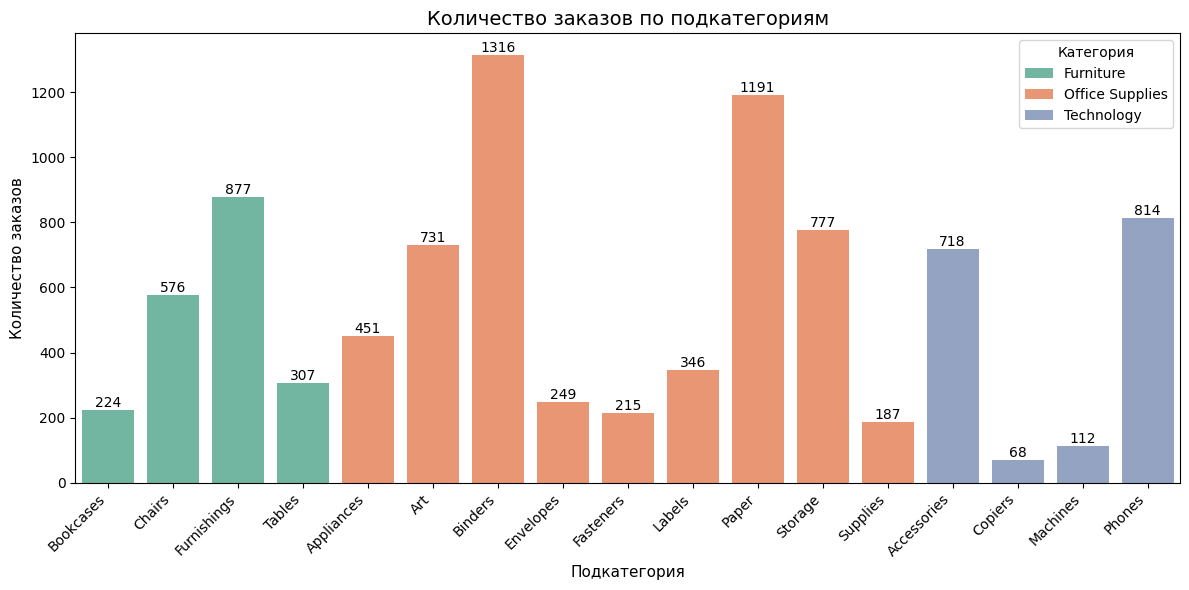

In [ ]:
order_counts.columns = ['Category', 'SubCategory', 'Orders']

plt.figure(figsize=(12,6))

sns.barplot(
    data=order_counts,
    x='SubCategory',
    y='Orders',
    hue='Category',
    palette='Set2'
)
for i, value in enumerate(order_counts["Orders"]):
    plt.text(i, value, f"{value:}",
             ha="center", va="bottom", fontsize=10)
plt.title("Количество заказов по подкатегориям", fontsize=14)
plt.xlabel("Подкатегория", fontsize=11)
plt.ylabel("Количество заказов", fontsize=11)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Категория')

plt.tight_layout()
plt.savefig("5.Количество заказов по подкатегориям.png", dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
monthly_orders = (df.groupby(df["Order Date"].dt.month)["Order ID"].nunique().reset_index())
monthly_orders.columns = ["Month", "Orders"]

month_names = {
    1: "Янв", 2: "Фев", 3: "Мар", 4: "Апр",
    5: "Май", 6: "Июн", 7: "Июл", 8: "Авг",
    9: "Сен", 10: "Окт", 11: "Ноя", 12: "Дек"
}

monthly_orders["MonthName"] = monthly_orders["Month"].map(month_names)
monthly_orders

,Month,Orders,MonthName
0,1,178,Янв
1,2,162,Фев
2,3,354,Мар
3,4,343,Апр
4,5,369,Май
5,6,364,Июн
6,7,338,Июл
7,8,341,Авг
8,9,688,Сен
9,10,417,Окт


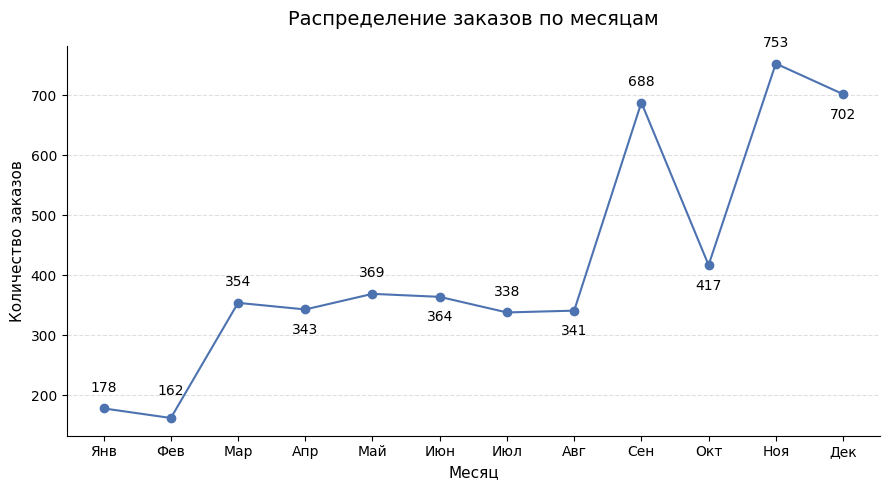

In [ ]:
color = "#4C72B0"

plt.figure(figsize=(9,5))

plt.plot(
    monthly_orders["MonthName"],
    monthly_orders["Orders"],
    marker="o",
    color="#4C72B0"
)

offset = monthly_orders["Orders"].max() * 0.03

for i, row in monthly_orders.iterrows():
    value = row["Orders"]
    month = row["MonthName"]

    direction = 1 if i % 2 == 0 else -1

    if month == "Фев":
        direction = 1.5

    plt.text(
        i,
        value + direction * offset,
        f"{value:,}",
        ha="center",
        va="bottom" if direction > 0 else "top",
        fontsize=10
    )



plt.title("Распределение заказов по месяцам", fontsize=14, pad=15)
plt.xlabel("Месяц", fontsize=11)
plt.ylabel("Количество заказов", fontsize=11)

plt.grid(axis="y", linestyle="--", alpha=0.4)

ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.savefig("6.Количество заказов по месяцам.png", dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
monthly_profit = (df.groupby(df["Order Date"].dt.month)['Profit'].sum().reset_index())
monthly_profit.columns = ["Month", "Profit"]

monthly_profit["MonthName"] = monthly_profit["Month"].map(month_names)
monthly_profit

,Month,Profit,MonthName
0,1,9134.4461,Янв
1,2,10294.6107,Фев
2,3,28594.6872,Мар
3,4,11587.4363,Апр
4,5,22411.3078,Май
5,6,21285.7954,Июн
6,7,13832.6648,Июл
7,8,21776.9384,Авг
8,9,36857.4753,Сен
9,10,31784.0413,Окт


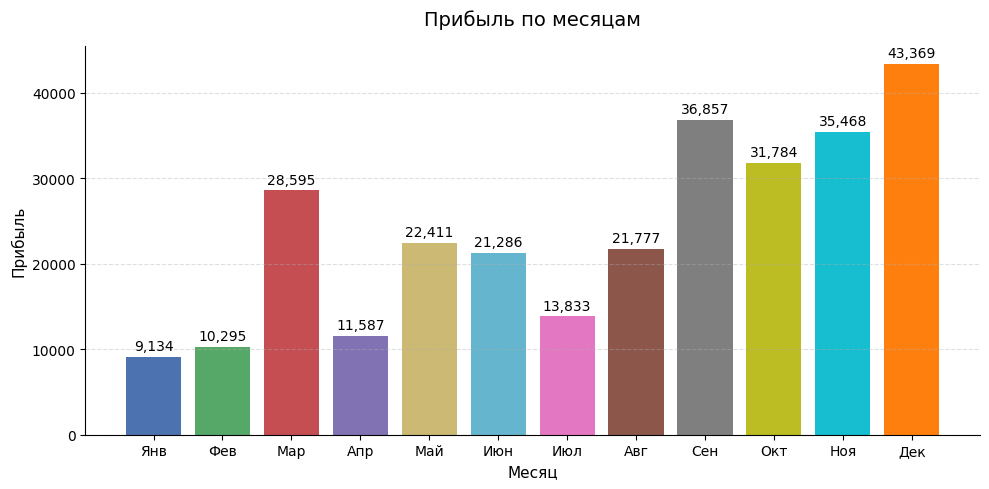

In [ ]:
plt.figure(figsize=(10,5))

colors = [
    "#4C72B0", "#55A868", "#C44E52", "#8172B3",
    "#CCB974", "#64B5CD", "#E377C2", "#8C564B",
    "#7F7F7F", "#BCBD22", "#17BECF", "#FF7F0E"
]

bars = plt.bar(
    monthly_profit["MonthName"],
    monthly_profit["Profit"],
    color=colors
)

offset = monthly_profit["Profit"].max() * 0.01

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height + offset,
        f"{height:,.0f}",
        ha="center",
        va="bottom",
        fontsize=10
    )

plt.title("Прибыль по месяцам", fontsize=14, pad=15)
plt.xlabel("Месяц", fontsize=11)
plt.ylabel("Прибыль", fontsize=11)

plt.grid(axis="y", linestyle="--", alpha=0.4)

ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.savefig("7.Прибыль по месяцам.png", dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
weekly_orders = (df.groupby(df["Order Date"].dt.weekday)['Order ID'].nunique().reset_index())
weekly_orders.columns = ["Week", "Orders"]
week_names = {
    0: "Пн", 1: "Вт", 2: "Ср", 3: "Чт",
    4: "Пт", 5: "Сб", 6: "Вс"}
weekly_orders["WeekName"] = weekly_orders["Week"].map(week_names)
weekly_orders

,Week,Orders,WeekName
0,0,920,Пн
1,1,558,Вт
2,2,182,Ср
3,3,746,Чт
4,4,916,Пт
5,5,837,Сб
6,6,850,Вс


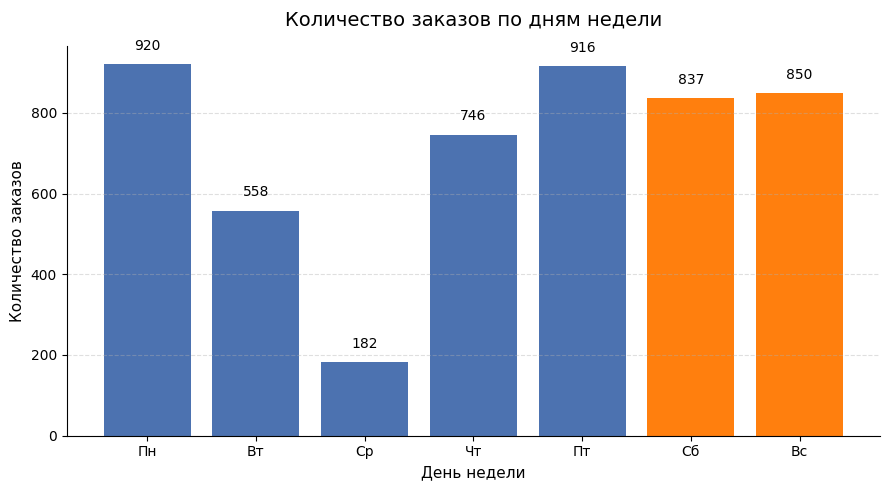

In [ ]:
plt.figure(figsize=(9,5))

colors = ["#4C72B0"]*5 + ["#FF7F0E", "#FF7F0E"]

bars = plt.bar(
    weekly_orders["WeekName"],
    weekly_orders["Orders"],
    color=colors
)

offset = weekly_orders["Orders"].max() * 0.03

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height + offset,
        f"{height:,}",
        ha="center",
        va="bottom",
        fontsize=10
    )

plt.title("Количество заказов по дням недели", fontsize=14, pad=15)
plt.xlabel("День недели", fontsize=11)
plt.ylabel("Количество заказов", fontsize=11)

plt.grid(axis="y", linestyle="--", alpha=0.4)

ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.savefig("8.Количество заказов по дням недели.png", dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
weekly_profit = (df.groupby(df["Order Date"].dt.weekday)['Profit'].sum().reset_index())
weekly_profit.columns = ["Week", "Profit"]
weekly_profit["WeekName"] = weekly_orders["Week"].map(week_names)
weekly_profit

,Week,Profit,WeekName
0,0,51511.1146,Пн
1,1,35570.3288,Вт
2,2,14703.8707,Ср
3,3,39683.7512,Чт
4,4,46520.8242,Пт
5,5,41277.6202,Сб
6,6,57129.5120,Вс


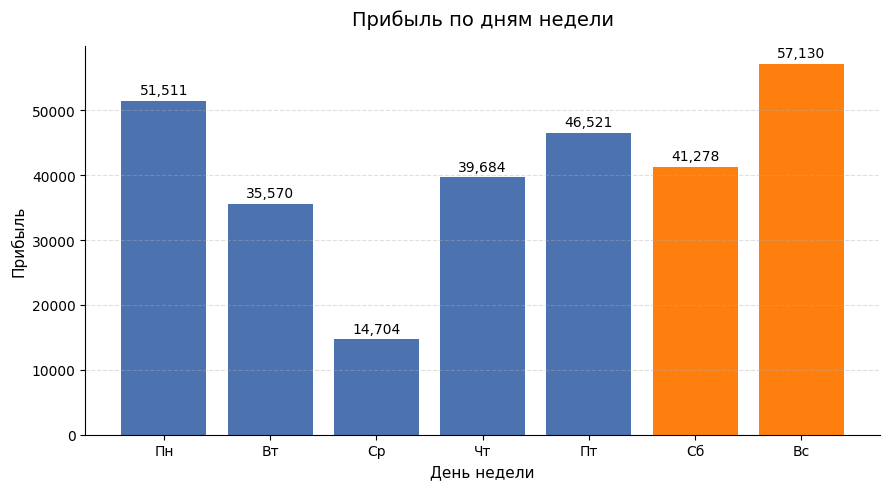

In [ ]:
plt.figure(figsize=(9,5))

colors = ["#4C72B0"]*5 + ["#FF7F0E", "#FF7F0E"]

bars = plt.bar(
    weekly_profit["WeekName"],
    weekly_profit["Profit"],
    color=colors
)

offset = weekly_profit["Profit"].max() * 0.01

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height + offset,
        f"{height:,.0f}",
        ha="center",
        va="bottom",
        fontsize=10
    )

plt.title("Прибыль по дням недели", fontsize=14, pad=15)
plt.xlabel("День недели", fontsize=11)
plt.ylabel("Прибыль", fontsize=11)

plt.grid(axis="y", linestyle="--", alpha=0.4)

ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.savefig("9.Прибыль по дням недели.png", dpi=300, bbox_inches='tight')
plt.show()

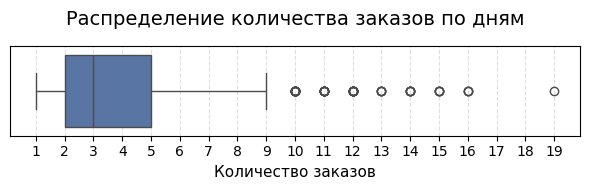

In [ ]:
from matplotlib.ticker import MaxNLocator

plt.figure(figsize=(6,2))

sns.boxplot(
    x=daily_orders['orders'],
    color="#4C72B0"
)

plt.title("Распределение количества заказов по дням", fontsize=14, pad=15)
plt.xlabel("Количество заказов", fontsize=11)
plt.yticks([])
plt.grid(axis="x", linestyle="--", alpha=0.4)

ax = plt.gca()

min_order = int(daily_orders['orders'].min())
max_order = int(daily_orders['orders'].max())
ax.set_xticks(range(min_order, max_order + 1))

plt.tight_layout()
plt.savefig("10.БоксПлот.Распределение количества заказов по дням.png", dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
daily_orders["t"] = (
    daily_orders["date"] - daily_orders["date"].min()
).dt.days

In [ ]:
x = daily_orders[['t']]
y = daily_orders['orders']

model = LinearRegression()

model.fit(x, y)

daily_orders['Trend'] = model.predict(x)

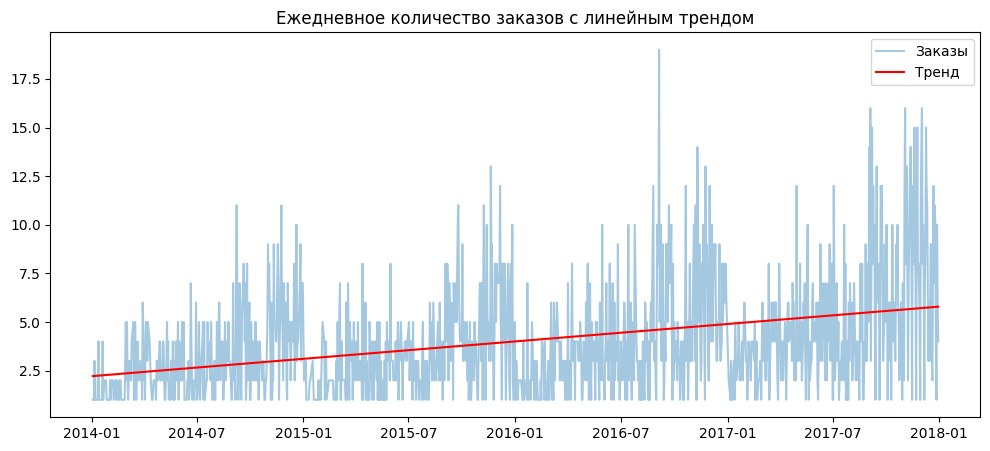

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(daily_orders["date"], daily_orders["orders"],
         alpha=0.4, label="Заказы")
plt.plot(daily_orders["date"], daily_orders["Trend"],
         color="red", label="Тренд")
plt.legend()
plt.title("Ежедневное количество заказов с линейным трендом")
plt.savefig("11.Тренд.png", dpi=300, bbox_inches='tight')
plt.show()
